<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Validation-Errors" data-toc-modified-id="Validation-Errors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Validation Errors</a></span></li><li><span><a href="#Submit" data-toc-modified-id="Submit-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Submit</a></span></li></ul></div>

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix

SEED = 42
tf.random.set_seed(SEED)

id2class = [
    "Palladian architecture",
    "Art Deco architecture",
    "American craftsman style",
    "International style",
    "Queen Anne architecture",
    "American Foursquare architecture",
    "Russian Revival architecture",
    "Colonial architecture",
    "Bauhaus architecture",
    "Postmodern architecture",
    "Tudor Revival architecture",
    "Achaemenid architecture",
    "Art Nouveau architecture",
    "Chicago school architecture",
    "Baroque architecture",
    "Georgian architecture",
    "Ancient Egyptian architecture",
    "Romanesque architecture",
    "Edwardian architecture",
    "Greek Revival architecture",
    "Byzantine architecture",
    "Gothic architecture",
    "Novelty architecture",
    "Beaux-Arts architecture"
]

class_names = [str(id) for id, _ in enumerate(id2class)]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
DATA_PATH = 'drive/MyDrive/Colab\ Notebooks/cnn_sphere'

In [4]:
!mkdir data

In [5]:
!unzip $DATA_PATH/introml2020-4.zip -d data

Archive:  drive/MyDrive/Colab Notebooks/cnn_sphere/introml2020-4.zip
  inflating: data/test/test/0.jpg    
  inflating: data/test/test/1.jpg    
  inflating: data/test/test/10.jpg   
  inflating: data/test/test/100.jpg  
  inflating: data/test/test/1000.jpg  
  inflating: data/test/test/1001.jpg  
  inflating: data/test/test/1002.jpg  
  inflating: data/test/test/1003.jpg  
  inflating: data/test/test/1004.jpg  
  inflating: data/test/test/1005.jpg  
  inflating: data/test/test/1006.jpg  
  inflating: data/test/test/1007.jpg  
  inflating: data/test/test/1008.jpg  
  inflating: data/test/test/1009.jpg  
  inflating: data/test/test/101.jpg  
  inflating: data/test/test/1010.jpg  
  inflating: data/test/test/1011.jpg  
  inflating: data/test/test/1012.jpg  
  inflating: data/test/test/1013.jpg  
  inflating: data/test/test/1014.jpg  
  inflating: data/test/test/1015.jpg  
  inflating: data/test/test/1016.jpg  
  inflating: data/test/test/1017.jpg  
  inflating: data/test/test/1018.jpg  


In [6]:
!ls data

test  train


In [7]:
image_size = (224, 224)
batch_size = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="./data/train/train",
    labels="inferred",
    class_names=class_names,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="./data/train/train",
    labels="inferred",
    class_names=class_names,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=image_size,
    batch_size=batch_size
)

Found 3069 files belonging to 24 classes.
Using 2456 files for training.
Found 3069 files belonging to 24 classes.
Using 613 files for validation.


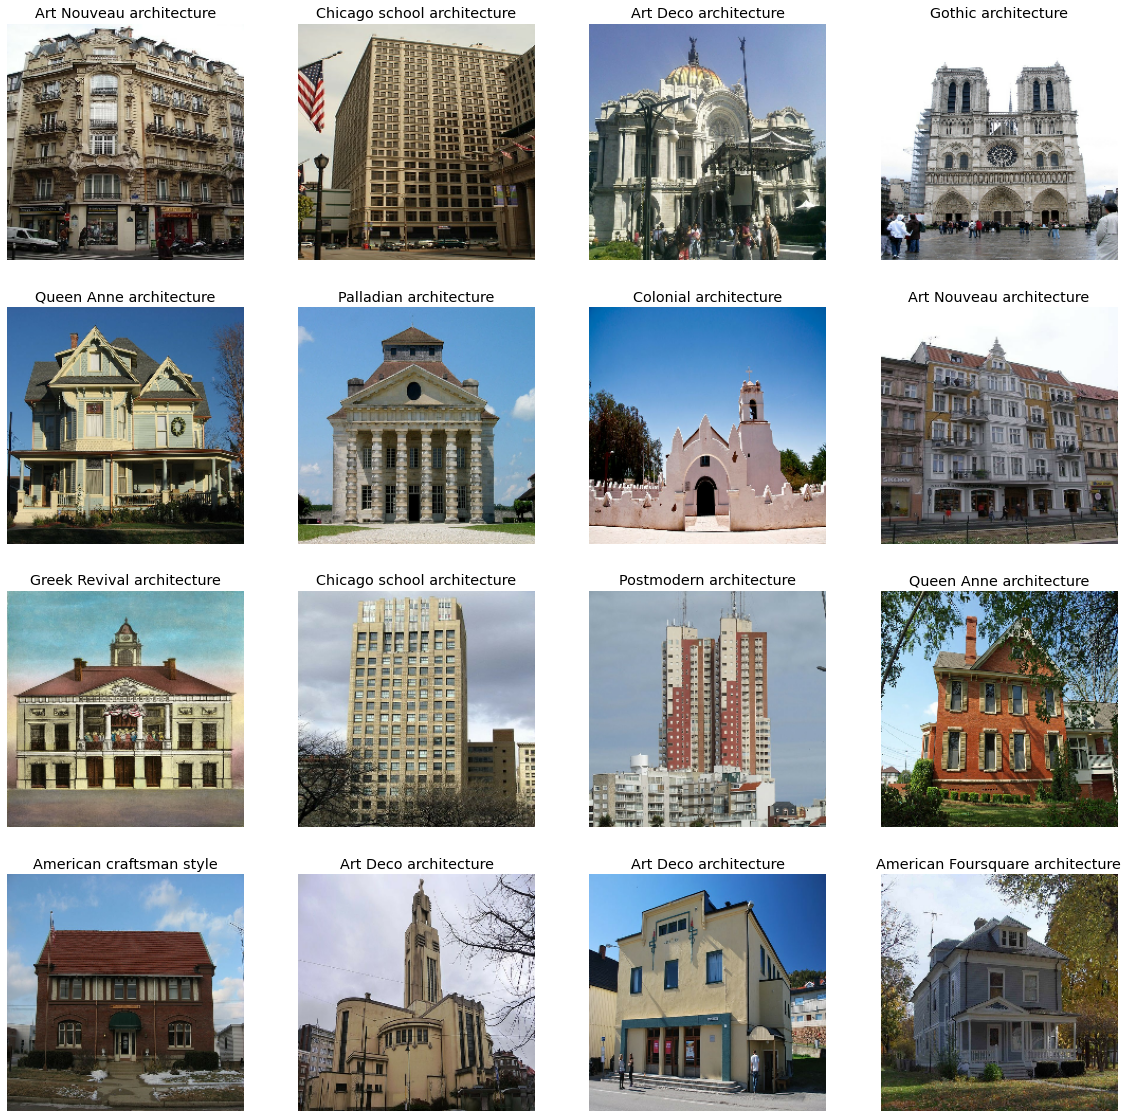

In [8]:
N_ROWS = 4
N_COLS = 4

fig, ax = plt.subplots(nrows=N_ROWS, ncols=N_COLS, figsize=(20, 20))

for images, targets in train_ds.take(1):
    images = images.numpy().astype("uint8")
    for i in range(N_ROWS):
        for j in range(N_COLS):
            ax[i, j].set_title(id2class[targets[i * N_COLS + j]])
            ax[i, j].imshow(images[i * N_COLS + j])
            ax[i, j].axis("off")
plt.show()

In [9]:
i = tf.keras.layers.Input([224, 224, 3], dtype=tf.float32)
x = tf.keras.applications.resnet50.preprocess_input(i)
backbone = tf.keras.applications.ResNet50(include_top=False, weights='imagenet')
backbone.trainable = False
x = backbone(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(units=len(id2class), activation="softmax")(x)
model = tf.keras.Model(inputs=[i], outputs=[x])

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=tf.keras.metrics.SparseCategoricalAccuracy()
)

In [11]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
154/154 [==============================] - 21s 139ms/step - loss: 2.1718 - sparse_categorical_accuracy: 0.3819 - val_loss: 1.4393 - val_sparse_categorical_accuracy: 0.5400
Epoch 2/10
154/154 [==============================] - 20s 130ms/step - loss: 1.2650 - sparse_categorical_accuracy: 0.5973 - val_loss: 1.2669 - val_sparse_categorical_accuracy: 0.5987
Epoch 3/10
154/154 [==============================] - 20s 132ms/step - loss: 1.0059 - sparse_categorical_accuracy: 0.6759 - val_loss: 1.1989 - val_sparse_categorical_accuracy: 0.6330
Epoch 4/10
154/154 [==============================] - 20s 130ms/step - loss: 0.8337 - sparse_categorical_accuracy: 0.7219 - val_loss: 1.1831 - val_sparse_categorical_accuracy: 0.6493
Epoch 5/10
154/154 [==============================] - 20s 130ms/step - loss: 0.7347 - sparse_categorical_accuracy: 0.7561 - val_loss: 1.1849 - val_sparse_categorical_accuracy: 0.6330
Epoch 6/10
154/154 [==============================] - 20s 127ms/step - loss: 0.6403 -

# Validation Errors

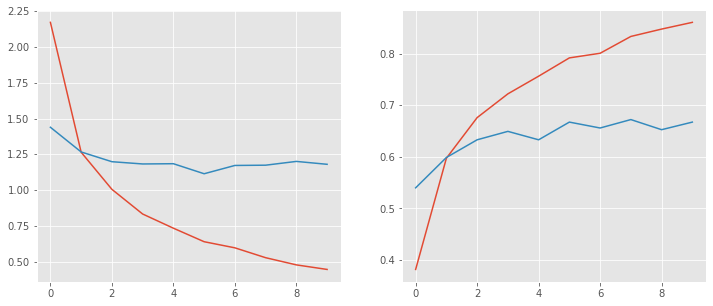

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.subplot(122)
plt.plot(history.history["sparse_categorical_accuracy"], label="train")
plt.plot(history.history["val_sparse_categorical_accuracy"], label="val")
plt.show()

In [13]:
true_labels = []
predicted_labels = []

for batch, labels in val_ds:
  true_labels.append(labels.numpy())
  predicted_labels.append(tf.argmax(model(batch), axis=1).numpy())

In [14]:
true_labels = np.hstack(true_labels)
predicted_labels = np.hstack(predicted_labels)

In [15]:
conf_mat = confusion_matrix(true_labels, predicted_labels)

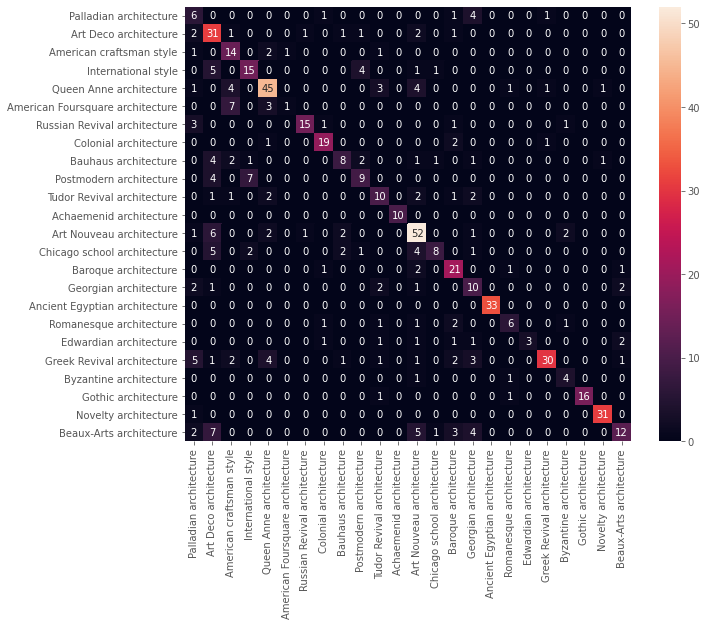

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, xticklabels=id2class, yticklabels=id2class, annot=True)

# Submit

In [22]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="./data/test",
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

Found 1512 files belonging to 1 classes.


In [23]:
file_ids = [os.path.splitext(filename)[0] for filename in sorted(os.listdir('./data/test/test'))]

predictions = np.hstack([
  tf.argmax(model(batch), axis=1).numpy()
  for batch, _ in test_ds
])

In [24]:
submit = pd.DataFrame({"Id": file_ids, "Category": predictions})

In [25]:
submit.to_csv("baseline.csv", index=False)

In [26]:
!head baseline.csv

Id,Category
0,16
1,12
10,19
100,22
1000,12
1001,22
1002,1
1003,14
1004,22


In [ ]:
from google.colab import files

files.download("baseline.csv")